In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import networkx as nx
import time
import datetime
from shapely.geometry import MultiPoint, Point, Polygon
from shapely.ops import nearest_points

----
## EcoBici Trips (2018)

In [108]:
df_usuarios = pd.read_csv("data/usuarios-ecobici-2018.csv")

In [109]:
df_usuarios.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,380973,F,49,03/10/2018,5:57:40
1,381008,M,26,02/01/2018,5:53:06
2,624273,M,22,28/09/2018,5:57:35
3,624274,F,24,28/09/2018,5:57:35
4,624275,M,30,05/10/2018,5:57:42


In [110]:
usuarios_by_gender = df_usuarios['usuario_sexo'].value_counts(normalize=True) * 100
usuarios_by_gender

M    54.469403
F    45.528817
O     0.001780
Name: usuario_sexo, dtype: float64

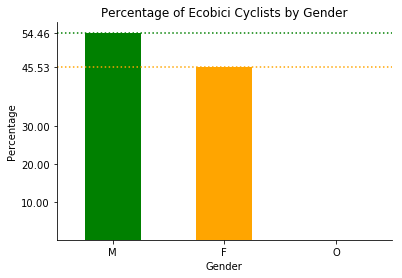

In [111]:
gender_plot = usuarios_by_gender.plot(kind="bar", title="Percentage of Ecobici Cyclists by Gender", color=['green','orange','blue'])

gender_plot.set_xlabel("Gender")
gender_plot.set_ylabel("Percentage")
gender_plot.axhline(y=54.46, color="green", linestyle=':')
gender_plot.axhline(y=45.53, color="orange", linestyle=":")

y_ticks = [10,20,30,45.53,54.46]
gender_plot.set_yticks(y_ticks)
gender_plot.tick_params(axis='x', labelrotation=0)
gender_plot.spines['right'].set_visible(False)
gender_plot.spines['top'].set_visible(False)

In [137]:
fig = gender_plot.get_figure()
fig.savefig("../images/ecobici-by-gender-2018.png", dpi=1200)

In [112]:
df_viajes = pd.read_csv("data/recorridos-realizados-2018.csv")

In [113]:
df_viajes.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27


In [13]:
df_viajes['month'] = pd.to_datetime(df_viajes['bici_Fecha_hora_retiro']).dt.to_period('M')

In [14]:
viajes_by_month = df_viajes.groupby('month')['month'].count()
viajes_by_month

month
2018-01    119316
2018-02    123300
2018-03    113772
2018-04    188338
2018-05    247297
2018-06    263851
2018-07    222789
2018-08    319342
2018-09    336539
2018-10    306941
2018-11    237910
2018-12    140573
Freq: M, Name: month, dtype: int64

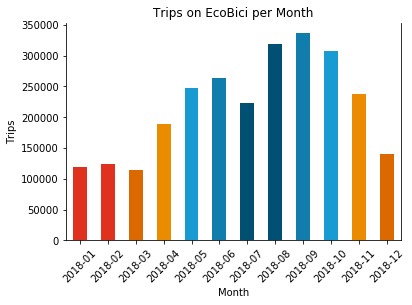

In [15]:
month_plot = viajes_by_month.plot(kind="bar", title="Trips on EcoBici per Month", color=['#e0301e','#e0301e','#dc6900','#eb8c00','#189ad3','#107dac','#005073','#005073','#107dac','#189ad3','#eb8c00','#dc6900'])
month_plot.set_xlabel("Month")
month_plot.set_ylabel("Trips")
month_plot.tick_params(axis='x', labelrotation=45)

month_plot.spines['top'].set_visible(False)

In [16]:
temperatura_df = pd.read_csv("data/datos_smn_promedio.csv")
temperatura_df = temperatura_df.T
temperatura_df = temperatura_df.reset_index()

In [17]:
temperatura_df.columns = temperatura_df.iloc[0,]
temperatura_df = temperatura_df.drop([0])
temperatura_df = temperatura_df.rename(columns={'tipo_medicion':'Mes', 'Temperatura promedio':'Mean Temperature', 'Temperatura maxima': 'Max Temperature', 'Temperatura minima':'Min Temperature'})

In [18]:
temperatura_df.head()

,Mes,Mean Temperature,Max Temperature,Min Temperature,Humedad relativa,Velocidad del Viento (km/h),Nubosidad total,Precipitacion,Frecuencia de dias con Precipitacion superior a 0.1 mm
1,enero,24.9,30.1,20.1,64.7,10,3.3,138.7,9
2,febrero,23.6,28.7,19.2,69.7,9.5,3.3,127.2,8
3,marzo,21.9,26.8,17.7,72.6,8.8,3.3,140.1,8.8
4,abril,17.9,22.9,13.8,76.3,7.7,3.5,118.9,9.1
5,mayo,14.6,19.3,10.7,77.5,7.9,4,92.3,7.1


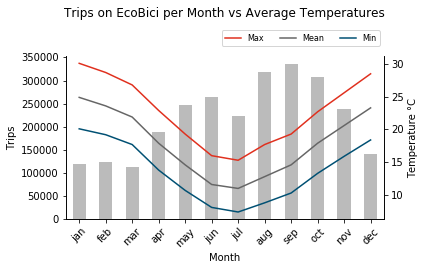

In [236]:
fig, ax1 = plt.subplots()

month_plot = viajes_by_month.plot(kind="bar", title="Trips on EcoBici per Month vs Average Temperatures", color="#bbbbbb")
ttl = month_plot.title
ttl.set_position([.5, 1.2])
month_plot.set_xlabel("Month")
month_plot.set_ylabel("Trips")
month_plot.tick_params(axis='x', labelrotation=45)

month_plot.spines['top'].set_visible(False)

temperature_plot = month_plot.twinx()

temperatura_df.plot(ax=temperature_plot, kind='line',x='Mes',y='Max Temperature', color="#e0301e")
temperatura_df.plot(ax=temperature_plot, kind="line", x="Mes", y="Mean Temperature", color="#666666")
temperatura_df.plot(ax=temperature_plot, kind='line',x='Mes',y='Min Temperature', color="#005073")

temperature_plot.set_ylabel('Temperature °C')
temperature_plot.spines['top'].set_visible(False)
temperature_plot.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
temperature_plot.legend(labels=["Max", "Mean", "Min"], bbox_to_anchor=(1,1.18), ncol=3, prop={'size': 8})

fig.tight_layout()
fig.savefig("../images/ecobici-monthly-trips-vs-temperature.png", dpi=1200)

----
## ENMODO Survey Analysis (2009-2010)

In [98]:
df_trips = pd.read_csv("data/enmodo/bases_enmodo/ENMODO_VIAJES_pub_20121115.csv")
df_people = pd.read_csv("data/enmodo/bases_enmodo/ENMODO_PERSONAS_pub_20121115.csv")

In [99]:
df_trips.head()

,partido,fraccion,LOCALIDA,ORDEN,ACTIORIG,ACTIDEST,HORAINI,HORAFIN,TIPOTRAN,HORASALI,...,FRECUENC,wt1,z_frecuenc_imput,TT_PARTIDO_ORIGEN,TT_LOCALIDAD_ORIGEN,TT_PARTIDO_DESTINO,TT_LOCALIDAD_DESTINO,IDH,IDP,IDV
0,427,1,42710,1,1,2,1/1/1900 7:45:00,1/1/1900 9:00:00,0,7,...,99999,182.836868,4.829143,427,42710,901,132,2,12345,104669
1,427,1,42710,1,2,2,1/1/1900 13:00:00,1/1/1900 13:30:00,0,13,...,99999,182.836868,2.384141,901,132,906,131,2,12345,104668
2,427,1,42710,1,2,20,1/1/1900 19:00:00,1/1/1900 19:15:00,0,19,...,99999,182.836868,2.384141,906,131,902,103,2,12345,104667
3,427,1,42710,1,20,1,1/1/1900 19:30:00,1/1/1900 20:00:00,0,19,...,99999,182.836868,1.685239,902,103,427,42710,2,12345,104666
4,28,2,2806,2,3,7,1/1/1900 10:20:00,1/1/1900 10:40:00,0,10,...,99999,348.047668,2.384141,28,2806,28,2801,11,12367,104665


In [100]:
df_people.head()

,PARTIDO,fraccion,LOCALIDA,EDAD,SEXO,RELACION,NIVELEST,NIVELEC,AMBITOES,LICENCIA,...,CDNINGUN,CDMOTORA,CDMENTAL,CDVISUAL,CDAUDITI,CDHABLA,CDOTRAS,wt1,IDH,IDP
0,427,1,42710,24,Masculino,1,8,1,0,1,...,1,0,0,0,0,0,0,182.836868,2,12345
1,427,1,42710,57,Femenino,1,4,1,0,4,...,1,0,0,0,0,0,0,140.886429,3,12346
2,427,1,42710,59,Masculino,2,5,1,0,1,...,1,0,0,0,0,0,0,140.886429,3,12347
3,427,1,42710,72,Masculino,1,5,1,0,4,...,1,0,0,0,0,0,0,115.070709,4,12348
4,427,1,42710,64,Femenino,2,5,1,0,4,...,1,0,0,0,0,0,0,115.070709,4,12349


In [101]:
# filter out trips outside of the City of Buenos Aires
bsas_areas = list(map(lambda x: str(x), list(range(101,149))))

df_trips = df_trips[(df_trips['TT_LOCALIDAD_ORIGEN'].isin(bsas_areas)) & (df_trips['TT_LOCALIDAD_DESTINO'].isin(bsas_areas))]
df_trips.head()

,partido,fraccion,LOCALIDA,ORDEN,ACTIORIG,ACTIDEST,HORAINI,HORAFIN,TIPOTRAN,HORASALI,...,FRECUENC,wt1,z_frecuenc_imput,TT_PARTIDO_ORIGEN,TT_LOCALIDAD_ORIGEN,TT_PARTIDO_DESTINO,TT_LOCALIDAD_DESTINO,IDH,IDP,IDV
1,427,1,42710,1,2,2,1/1/1900 13:00:00,1/1/1900 13:30:00,0,13,...,99999,182.836868,2.384141,901,132,906,131,2,12345,104668
2,427,1,42710,1,2,20,1/1/1900 19:00:00,1/1/1900 19:15:00,0,19,...,99999,182.836868,2.384141,906,131,902,103,2,12345,104667
9,861,2,86101,1,3,16,1/1/1900 14:30:00,1/1/1900 14:45:00,0,14,...,99999,356.583618,2.384141,901,128,901,132,16,12374,104660
80,28,3,2806,1,19,2,1/1/1900 5:30:00,1/1/1900 5:50:00,0,5,...,99999,185.435471,2.384141,905,125,906,125,33,12411,82304
188,916,3,144,1,1,7,1/1/1900 16:00:00,1/1/1900 16:10:00,0,16,...,99999,327.880402,2.215454,916,144,917,138,52,12467,82196


In [102]:
df_trips.shape

(16489, 23)

In [103]:
df_legs = pd.read_csv('data/enmodo/bases_enmodo/ENMODO_ETAPAS_pub_20121115.csv')

/anaconda3/envs/OSMNX/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [104]:
df_legs.head()

,fraccion,partido,LOCALIDA,ETAPANUM,MOTIVOCA,ESTENT,ESTSAL,TARIFABO,TIPOTARI,TIPOGARA,...,wt1,z_tarifabo2,z_frecuenc_imput,z_costota2_2,z_costopea,z_COSTOEST,IDH,IDP,IDV,IDE
0,1,427,42710,1,-1,1,1,1.1,1,-1,...,182.836868,1.1,4.829143,-1.0,-1.0,-1.0,2,12345,104669,1
1,1,427,42710,2,-1,2,2,1.1,1,-1,...,182.836868,1.1,4.829143,-1.0,-1.0,-1.0,2,12345,104669,2
2,1,427,42710,1,-1,2,2,1.1,1,-1,...,182.836868,1.1,2.384141,-1.0,-1.0,-1.0,2,12345,104668,3
3,1,427,42710,1,7,0,0,-1.0,-1,-1,...,182.836868,-1.0,2.384141,-1.0,-1.0,-1.0,2,12345,104667,4
4,1,427,42710,1,-1,1,1,1.1,1,-1,...,182.836868,1.1,1.685239,-1.0,-1.0,-1.0,2,12345,104666,5


In [27]:
df_legs.shape

(117784, 40)

In [105]:
df_join_trips_legs = pd.merge(df_trips, df_legs, on="IDV", how="inner")
df_join_trips_legs.head()

,partido_x,fraccion_x,LOCALIDA_x,ORDEN,ACTIORIG,ACTIDEST,HORAINI,HORAFIN,TIPOTRAN,HORASALI,...,Z_TXTLINEA_SIN_CODIGO,wt1_y,z_tarifabo2,z_frecuenc_imput_y,z_costota2_2,z_costopea,z_COSTOEST,IDH_y,IDP_y,IDE
0,427,1,42710,1,2,2,1/1/1900 13:00:00,1/1/1900 13:30:00,0,13,...,,182.836868,1.1,2.384141,-1.0,-1.0,-1.0,2,12345,3
1,427,1,42710,1,2,20,1/1/1900 19:00:00,1/1/1900 19:15:00,0,19,...,,182.836868,-1.0,2.384141,-1.0,-1.0,-1.0,2,12345,4
2,861,2,86101,1,3,16,1/1/1900 14:30:00,1/1/1900 14:45:00,0,14,...,,356.583618,-1.0,2.384141,7.0,-1.0,-1.0,16,12374,13
3,28,3,2806,1,19,2,1/1/1900 5:30:00,1/1/1900 5:50:00,0,5,...,,185.435471,-1.0,2.384141,-1.0,0.0,0.0,33,12411,92
4,916,3,144,1,1,7,1/1/1900 16:00:00,1/1/1900 16:10:00,0,16,...,,327.880402,-1.0,2.215454,-1.0,0.0,0.0,52,12467,221


In [106]:
df_join_trips_legs.shape

(17334, 62)

In [107]:
df_legs_cycling = df_join_trips_legs[df_join_trips_legs['MODOTRAN'] == 12]

In [108]:
df_legs_cycling.shape

(216, 62)

In [109]:
percentage_cyclists_over_total = df_legs_cycling.shape[0] * 100 / df_join_trips_legs.shape[0]
percentage_cyclists_over_total

1.2461059190031152

In [110]:
df_legs_cycling = df_legs_cycling.rename(columns={'IDP_x':'IDP'})
df_join_cycling_people = pd.merge(df_legs_cycling, df_people, on="IDP", how="inner")

In [111]:
df_join_cycling_people.head()

,partido_x,fraccion_x,LOCALIDA_x,ORDEN_x,ACTIORIG,ACTIDEST,HORAINI,HORAFIN,TIPOTRAN,HORASALI,...,DESCTRAB,CDNINGUN,CDMOTORA,CDMENTAL,CDVISUAL,CDAUDITI,CDHABLA,CDOTRAS,wt1,IDH
0,916,4,148,1,1,8,1/1/1900 8:50:00,1/1/1900 9:00:00,0,8,...,,1,0,0,0,0,0,0,138.962631,575
1,916,4,148,1,8,1,1/1/1900 10:15:00,1/1/1900 10:30:00,0,10,...,,1,0,0,0,0,0,0,138.962631,575
2,916,4,148,2,11,1,1/1/1900 17:50:00,1/1/1900 18:00:00,0,17,...,PELUQUERA,1,0,0,0,0,0,0,154.313751,584
3,911,3,113,3,1,2,1/1/1900 16:30:00,1/1/1900 17:10:00,0,16,...,PROFESOR DE MUSICA POR CUENTA PROPIA,1,0,0,0,0,0,0,324.392334,677
4,911,3,113,3,2,2,1/1/1900 18:30:00,1/1/1900 18:50:00,0,18,...,PROFESOR DE MUSICA POR CUENTA PROPIA,1,0,0,0,0,0,0,324.392334,677


In [112]:
cyclists_by_gender = df_join_cycling_people['SEXO'].value_counts(normalize=True) * 100
cyclists_by_gender

Masculino    74.074074
Femenino     25.925926
Name: SEXO, dtype: float64

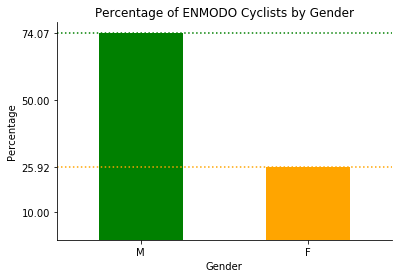

In [35]:
gender_plot = cyclists_by_gender.plot(kind="bar", title="Percentage of ENMODO Cyclists by Gender", color=['green','orange'])

gender_plot.set_xlabel("Gender")
gender_plot.set_ylabel("Percentage")
gender_plot.axhline(y=74.07, color="green", linestyle=':')
gender_plot.axhline(y=25.92, color="orange", linestyle=":")

y_ticks = [10,25.92,50,74.07]
gender_plot.set_yticks(y_ticks)
gender_plot.set_xticklabels(['M','F'])
gender_plot.tick_params(axis='x', labelrotation=0)
gender_plot.spines['right'].set_visible(False)
gender_plot.spines['top'].set_visible(False)

In [280]:
fig = gender_plot.get_figure()
fig.savefig("../images/enmodo-by-gender-2009-2010.png", dpi=1200)

## Cyclists characterists

In [119]:
bins= [0,10,20,30,40,50,60,70,100]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-100']
df_join_cycling_people['AgeGroup'] = pd.cut(df_join_cycling_people['EDAD'], bins=bins, labels=labels, right=False)
cyclists_by_age = df_join_cycling_people['AgeGroup'].value_counts(normalize=True).sort_index() * 100
cyclists_by_age

0-10       3.703704
10-20      6.018519
20-30     34.722222
30-40     17.129630
40-50     13.425926
50-60     10.185185
60-70     11.111111
70-100     3.703704
Name: AgeGroup, dtype: float64

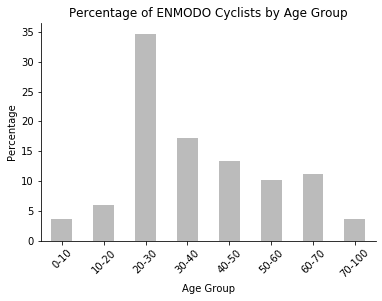

In [121]:
age_plot = cyclists_by_age.plot(kind="bar", title="Percentage of ENMODO Cyclists by Age Group", color='#bbbbbb')

age_plot.set_xlabel("Age Group")
age_plot.set_ylabel("Percentage")

age_plot.tick_params(axis='x', labelrotation=45)
age_plot.spines['right'].set_visible(False)
age_plot.spines['top'].set_visible(False)

In [122]:
fig = age_plot.get_figure()
fig.savefig("../images/enmodo-by-age-group-2009-2010.png", dpi=1200)

## OD Matrix

In [127]:
# Create OD matrix for cycling
columns = ['Origin'] + bsas_areas

od_matrix = pd.DataFrame(columns=columns)
od_matrix['Origin'] = sorted(bsas_areas)
od_matrix = od_matrix.set_index('Origin')
del od_matrix.index.name

od_matrix = od_matrix.fillna(0)

for index, row in df_join_cycling_people.iterrows():
    od_matrix.loc[str(row['TT_LOCALIDAD_ORIGEN']),str(row['TT_LOCALIDAD_DESTINO'])] += 1
    
od_matrix.head()

,101,102,103,104,105,106,107,108,109,110,...,139,140,141,142,143,144,145,146,147,148
101,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,2,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# plot OD matrix against barrios shapefile
barrios = gpd.read_file("data/barrios-zip/barrios_badata.shp")
barrios.head()

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"POLYGON ((100961.3380000005 103691.9736000001,..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"POLYGON ((99791.10360000003 103628.8876, 99787..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"POLYGON ((103627.714300001 103487.3577000005, ..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"POLYGON ((97128.43950000033 101597.5126, 97112..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"POLYGON ((104625.1425999999 101679.9345000004,..."


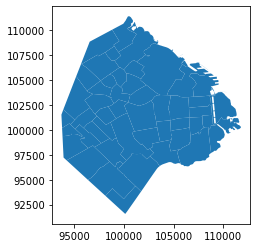

In [129]:
barrios.plot()

In [130]:
df_barrios_centroids = gpd.GeoDataFrame()
df_barrios_centroids['BARRIO'] = barrios['BARRIO']
df_barrios_centroids['geometry'] = barrios.centroid

data_barrios_id_names = {
    'id':bsas_areas,
    'BARRIO': ['AGRONOMIA','ALMAGRO','BALVANERA','BARRACAS','BELGRANO','BOCA','BOEDO','CABALLITO','CHACARITA','COGHLAN','COLEGIALES','CONSTITUCION','FLORES','FLORESTA','LINIERS','MATADEROS','MONSERRAT','MONTE CASTRO','NUÑEZ','NUEVA POMPEYA','PALERMO','PARQUE AVELLANEDA','PARQUE CHACABUCO','PARQUE CHAS','PARQUE PATRICIOS','PATERNAL','PUERTO MADERO','RECOLETA','RETIRO','SAAVEDRA','SAN CRISTOBAL','SAN NICOLAS','SAN TELMO','VILLA SOLDATI','VELEZ SARSFIELD','VERSALLES','VILLA CRESPO','VILLA DEL PARQUE','VILLA DEVOTO','VILLA GRAL. MITRE','VILLA LUGANO','VILLA LURO','VILLA ORTUZAR','VILLA PUEYRREDON','VILLA REAL','VILLA RIACHUELO','VILLA SANTA RITA','VILLA URQUIZA']
}

df_barrios_id_names = pd.DataFrame(data=data_barrios_id_names)

join_barrios_ids = pd.merge(df_barrios_centroids, df_barrios_id_names, on="BARRIO", how='inner')
join_barrios_ids = join_barrios_ids.set_index('id')

In [131]:
# Create graph from OD matrix
G = nx.Graph()
for area in od_matrix.columns:
    G.add_node(area, pos=(join_barrios_ids.loc[area,:]['geometry'].x,join_barrios_ids.loc[area,:]['geometry'].y))

for ind in od_matrix.index:
    for column in od_matrix.columns:
        if od_matrix.loc[ind,column] != 0:
            G.add_edge(ind, column, weight=od_matrix.loc[ind,column])

In [132]:
join_barrios_ids['degree'] = join_barrios_ids.index.map(G.degree)
join_barrios_ids.head()

,BARRIO,geometry,degree
id,,,
109,CHACARITA,POINT (100836.6600379702 104537.3027441941),1
126,PATERNAL,POINT (99507.82075800181 103533.0942648816),3
137,VILLA CRESPO,POINT (101887.370647498 103376.6672962438),6
138,VILLA DEL PARQUE,POINT (97488.79827837886 102775.5728133409),5
102,ALMAGRO,POINT (103811.4381368571 102222.7015218157),2


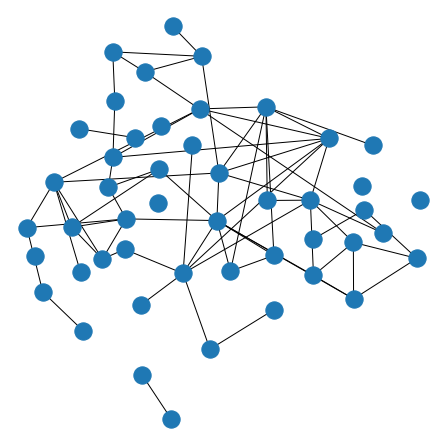

In [520]:
pos=nx.get_node_attributes(G,'pos')
plt.figure(1,figsize=(6,6)) 
nx.draw(G,pos)

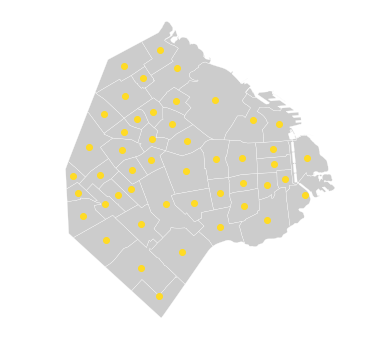

In [418]:
f, ax = plt.subplots(1, figsize=(6, 6))
barrios_plot = barrios.plot(ax=ax, color="#cccccc", linewidth=0.3, edgecolor="white")
join_barrios_ids.plot(ax=barrios_plot,color="#FFDB25")
barrios_plot.set_axis_off()

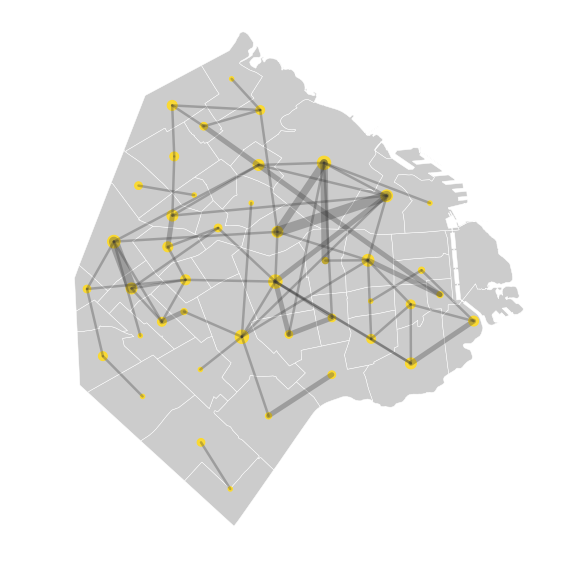

In [528]:
from matplotlib.path import Path
import matplotlib.patches as patches

f, ax = plt.subplots(1, figsize=(10, 10))
barrios_plot = barrios.plot(ax=ax, color="#cccccc", linewidth=0.5, edgecolor="white")
join_barrios_ids.plot(ax=barrios_plot,color="#FFDB25", alpha=0.9, markersize=join_barrios_ids['degree']*20)
barrios_plot.set_axis_off()

for edge in G.edges(data=True):
    weight = edge[2]['weight']
    origin = edge[0]
    destination = edge[1]
    
    x = [join_barrios_ids.loc[origin,:]['geometry'].x, join_barrios_ids.loc[destination,:]['geometry'].x]
    y = [join_barrios_ids.loc[origin,:]['geometry'].y, join_barrios_ids.loc[destination,:]['geometry'].y]
    
    barrios_plot.plot(x, y, color='#333333', linewidth=weight*2.5, solid_capstyle='round', zorder=1, alpha=0.3)

### Potential Cyclists

In [ ]:
# Use decision trees to select "potential" cyclists given a certain threshold
# Use 30% training set for cyclists and 70% for test for different strategies. 
# Once we have a "good-enough" model, expand to wider commuters. 
# Select a minimum probablity to consider the commuters "potential cyclists".
# Add them to the graph and the weights of the edges (but with a lower weight)
# Calculate n times (how to calculate n?) random spots in the neighbourhood of origin and in the destination
# Calculate shortest path on the cycle network
# Overlay with shade on the cycle lanes the user goes on. Calculate a percentage of shade for that trip.
# Do the same for the bike sharing routes!!! 

---
# Ciclovias Graph

In [514]:
ciclovias = nx.read_shp("data/ciclovias-with-path-column/ciclovias-with-paths-column-2.shp")

In [515]:
ciclovias_undirected = ciclovias.to_undirected()

In [280]:
nx.number_of_nodes(ciclovias_undirected)

2816

In [281]:
nx.number_of_edges(ciclovias_undirected)

2934

In [282]:
nx.write_shp(ciclovias_undirected, "data/ciclovias-graph")

In [36]:
# Example of shortest path calculation
random_shortest_path = nx.shortest_path(ciclovias_undirected, list(ciclovias_undirected.nodes())[0], list(ciclovias_undirected.nodes())[1000])
shortest_path_subgraph = ciclovias_undirected.subgraph(random_shortest_path)

In [37]:
nx.write_shp(shortest_path_subgraph, "data/random_shortest_path_subgraph")

In [283]:
ciclovias_nodes_df = gpd.read_file("data/ciclovias-graph/nodes.shp")

In [284]:
ciclovias_nodes_df.head()

,FID,geometry
0,0,POINT (103128.1074910719 108699.1917652902)
1,1,POINT (103084.6402128957 108735.1033540264)
2,2,POINT (104784.0365070056 107940.2413960831)
3,3,POINT (104545.6293329084 108118.791525889)
4,4,POINT (104911.6935667442 107817.8749045554)


In [202]:
join_barrios_polygon_id = pd.merge(barrios, df_barrios_id_names, on="BARRIO", how='inner')

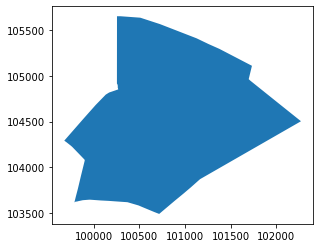

In [142]:
join_barrios_polygon_id.loc[[0],'geometry'].plot()

In [222]:
# Example of shortest path for the first trip in the survey
first_trip = df_join_cycling_people.loc[10]

origin_geom = join_barrios_polygon_id.loc[join_barrios_polygon_id['id'] == str(first_trip['TT_LOCALIDAD_ORIGEN']),'geometry']
destination_geom = join_barrios_polygon_id.loc[join_barrios_polygon_id['id'] == str(first_trip['TT_LOCALIDAD_DESTINO']),'geometry']

mask_origin = ciclovias_nodes_df.within(origin_geom.values[0])
nodes_origin = ciclovias_nodes_df.loc[mask_origin]
random_origin_node = nodes_origin.sample()

mask_dest = ciclovias_nodes_df.within(destination_geom.values[0])
nodes_dest = ciclovias_nodes_df.loc[mask_dest]
random_dest_node = nodes_dest.sample()

random_nodes = pd.concat([random_origin_node, random_dest_node])
random_nodes.to_file("data/first_trip_origin_dest_nodes")

first_trip_shortest_path = nx.shortest_path(ciclovias_undirected, list(ciclovias_undirected.nodes())[random_origin_node['FID'].values[0]], list(ciclovias_undirected.nodes())[random_dest_node['FID'].values[0]])
shortest_path_subgraph = ciclovias_undirected.subgraph(first_trip_shortest_path)
nx.write_shp(shortest_path_subgraph, "data/first_trip_shortest_path_subgraph")

In [285]:
## Calculate "most likely" routes on the cycle network based on ENMODO origin-destination survey
## and shortest path algorithm
for index,trip in df_join_cycling_people.iterrows():
    origin_geom = join_barrios_polygon_id.loc[join_barrios_polygon_id['id'] == str(trip['TT_LOCALIDAD_ORIGEN']),'geometry']
    destination_geom = join_barrios_polygon_id.loc[join_barrios_polygon_id['id'] == str(trip['TT_LOCALIDAD_DESTINO']),'geometry']

    mask_origin = ciclovias_nodes_df.within(origin_geom.values[0])
    nodes_origin = ciclovias_nodes_df.loc[mask_origin]
    if nodes_origin.shape[0] == 0:
        print("no origin cycle network in this neighbourhood")
        continue
    random_origin_node = nodes_origin.sample()

    mask_dest = ciclovias_nodes_df.within(destination_geom.values[0])
    nodes_dest = ciclovias_nodes_df.loc[mask_dest]
    if nodes_dest.shape[0] == 0:
        print("no destination cycle network in this neighbourhood")
        continue
    random_dest_node = nodes_dest.sample()
    
    try:
        trip_shortest_path = nx.shortest_path(ciclovias_undirected, list(ciclovias_undirected.nodes())[random_origin_node['FID'].values[0]], list(ciclovias_undirected.nodes())[random_dest_node['FID'].values[0]])
    except nx.NetworkXNoPath:
        print("no path between those points")
        continue
    for index, node in enumerate(trip_shortest_path):
        if index == len(trip_shortest_path)-1:
            break
        ciclovias_undirected[node][trip_shortest_path[index+1]]['paths_thru'] += 1

no path between those points
no path between those points
no path between those points
no origin cycle network in this neighbourhood
no destination cycle network in this neighbourhood
no origin cycle network in this neighbourhood
no destination cycle network in this neighbourhood
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no origin cycle network in this neighbourhood
no destination cycle network in this neighbourhood
no origin cycle network in this neighbourhood
no destination cycle network in this neighbourhood
no path between those points
no path between those points
no path between those points
no path between those points


In [286]:
nx.write_shp(ciclovias_undirected, "data/accumulated-shortest-paths")

In [526]:
## Calculate ENMODO origin nodes and destination nodes for edge centrality analysis
nodes_origin_enmodo = []
nodes_dest_enmodo = []

for index,trip in df_join_cycling_people.iterrows():
    origin_geom = join_barrios_polygon_id.loc[join_barrios_polygon_id['id'] == str(trip['TT_LOCALIDAD_ORIGEN']),'geometry']
    destination_geom = join_barrios_polygon_id.loc[join_barrios_polygon_id['id'] == str(trip['TT_LOCALIDAD_DESTINO']),'geometry']

    mask_origin = ciclovias_nodes_df.within(origin_geom.values[0])
    nodes_origin = ciclovias_nodes_df.loc[mask_origin]
    if nodes_origin.shape[0] == 0:
        print("no origin cycle network in this neighbourhood")
        continue
    random_origin_node = nodes_origin.sample()
    nodes_origin_enmodo.append(random_origin_node['geometry'].values[0])

    mask_dest = ciclovias_nodes_df.within(destination_geom.values[0])
    nodes_dest = ciclovias_nodes_df.loc[mask_dest]
    if nodes_dest.shape[0] == 0:
        print("no destination cycle network in this neighbourhood")
        continue
    random_dest_node = nodes_dest.sample()
    nodes_dest_enmodo.append(random_dest_node['geometry'].values[0])
    
print("number of origin nodes:",len(nodes_origin_enmodo))
print("number of dest nodes:",len(nodes_dest_enmodo))
    

no origin cycle network in this neighbourhood
no destination cycle network in this neighbourhood
no origin cycle network in this neighbourhood
no destination cycle network in this neighbourhood
no origin cycle network in this neighbourhood
no destination cycle network in this neighbourhood
no origin cycle network in this neighbourhood
no destination cycle network in this neighbourhood
number of origin nodes: 212
number of dest nodes: 208


In [528]:
ciclovias_nodes_origin_enmodo = ciclovias_nodes_df[ciclovias_nodes_df['geometry'].isin(nodes_origin_enmodo)]
ciclovias_nodes_dest_enmodo = ciclovias_nodes_df[ciclovias_nodes_df['geometry'].isin(nodes_dest_enmodo)]
ciclovias_nodes_origin_ids = list(ciclovias_nodes_origin_enmodo['FID'])
ciclovias_nodes_dest_ids = list(ciclovias_nodes_dest_enmodo['FID'])

ciclovias_nodes_origin_bet = [list(ciclovias_undirected.nodes())[i] for i in ciclovias_nodes_origin_ids]
ciclovias_nodes_dest_bet = [list(ciclovias_undirected.nodes())[i] for i in ciclovias_nodes_dest_ids]

In [529]:
edge_betweenness_enmodo = nx.edge_betweenness_centrality_subset(ciclovias_undirected, sources=ciclovias_nodes_origin_bet, targets=ciclovias_nodes_dest_bet)
nx.set_edge_attributes(ciclovias_undirected, edge_betweenness_enmodo, 'edge_bet')

In [530]:
nx.write_shp(ciclovias_undirected, "data/ciclovias-edge-betweenness-enmodo") 

----
## Accummulated paths for EcoBici trips

In [114]:
ecobici_trips = pd.read_csv("data/recorridos-realizados-2018.csv")

In [115]:
ecobici_stations = gpd.read_file("data/estaciones-de-bicicletas-zip/estaciones_de_bicicletas.shp")

In [116]:
ecobici_stations.head()

,NOMBRE,DOMICILIO,IMAGEN,AUTOMAT,OBSERV,NRO_EST,Horario,DIRE_NORM,geometry
0,Facultad de Derecho,Av. Pres.Figueroa Alcorta y Juan A.Bibiloni,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),1,Estación automática: disponibilidad las 24 horas,"FIGUEROA ALCORTA, PRES. AV. y BIBILONI, JUAN A.",POINT (106500.1614316216 105115.8842306505)
1,Retiro,Av. Dr.Jose Ramos Mejia y Del Libertador Av,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),2,Estación automática: disponibilidad las 24 horas,"DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, ...",POINT (108116.8044073329 104065.6636622671)
2,Aduana,Av. Ing.Huergo y Av. Belgrano,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),3,Estación automática: disponibilidad las 24 horas,"HUERGO, ING. AV. y BELGRANO AV.",POINT (108656.4991851976 101995.912834517)
3,Plaza Roma,Lavalle y Bouchard,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),4,Estación automática: disponibilidad las 24 horas,LAVALLE y BOUCHARD,POINT (108654.4961211179 103052.1057258441)
4,Parque Lezama,Av Martín García e Irala,estacion_automatica.png,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),6,Estación automática: disponibilidad las 24 horas,"GARCIA, MARTIN AV. e IRALA",POINT (108582.2210239185 100103.5308220291)


In [117]:
ecobici_trips.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27


In [118]:
## Eliminate trips that start and end at the same station 
# 1. We assume these trips are for leisure
# 2. It would be impossible to guess the path anyway

print("ecobici trips before filtering same o/d: ", ecobici_trips.shape[0])
ecobici_trips = ecobici_trips[ecobici_trips['bici_estacion_origen'] != ecobici_trips['bici_estacion_destino']]
print("ecobici trips after filtering same o/d: ", ecobici_trips.shape[0])

('ecobici trips before filtering same o/d: ', 2619968)
('ecobici trips after filtering same o/d: ', 2393240)


In [119]:
ecobici_trips.loc[:,'bici_tiempo_uso'] = pd.to_timedelta(ecobici_trips['bici_tiempo_uso'])

In [120]:
# Eliminate trips that are too long to be a direct route
print("ecobici trips before filtering > 1 hr trips: ", ecobici_trips.shape[0])
ecobici_trips = ecobici_trips[ecobici_trips['bici_tiempo_uso'] < datetime.timedelta(hours=1)]
print("ecobici trips after filtering > 1 hr trips: ", ecobici_trips.shape[0])

('ecobici trips before filtering > 1 hr trips: ', 2393240)
('ecobici trips after filtering > 1 hr trips: ', 2223183)


In [399]:
ecobici_trips.loc[:,'bici_Fecha_hora_retiro'] = pd.to_datetime(ecobici_trips['bici_Fecha_hora_retiro'])
ecobici_trips.loc[:,'bici_day_of_week'] = ecobici_trips['bici_Fecha_hora_retiro'].dt.day_name()
ecobici_trips.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,bici_day_of_week
0,5453,2018-01-01 00:08:05,00:19:53,Uruguay,45,Virrey Cevallos,183,M,45,Monday
1,673,2018-01-01 00:18:05,00:26:19,Posadas,189,Guardia Vieja,110,M,61,Monday
2,179119,2018-01-01 00:20:14,00:27:39,Hospital Rivadavia,50,Padilla,31,F,52,Monday
3,400147,2018-01-01 00:20:22,00:48:51,Macacha Güemes,111,Acuña de Figueroa,54,M,27,Monday
4,400156,2018-01-01 00:20:31,00:49:27,Macacha Güemes,111,Acuña de Figueroa,54,F,27,Monday


In [402]:
# Eliminate trips on weekends - we assume they are more recreational
print("ecobici trips before filtering out weekends: ", ecobici_trips.shape[0])
ecobici_trips = ecobici_trips[(ecobici_trips['bici_day_of_week'] != 'Saturday') & (ecobici_trips['bici_day_of_week'] != 'Sunday')]
print("ecobici trips after filtering out weekends: ", ecobici_trips.shape[0])

ecobici trips before filtering out weekends:  2223184
ecobici trips after filtering out weekends:  1822091


In [407]:
# Get unique users
print("unique users are:", len(ecobici_trips['bici_id_usuario'].unique()))

unique users are: 101189


In [326]:
# Add nearest ciclovia node to the ecobici stations
ecobici_stations['nearest_ciclovia_node'] = None
for index, row in ecobici_stations.iterrows():
    point = row.geometry
    multipoint = ciclovias_nodes_df.drop(index, axis=0).geometry.unary_union
    queried_geom, nearest_geom = nearest_points(point, multipoint)
    ecobici_stations.loc[index, 'nearest_ciclovia_node'] = nearest_geom

In [327]:
# Take first trip as an example for shortest path
first_trip = ecobici_trips.loc[2]
first_trip_origin = ecobici_stations[ecobici_stations['NRO_EST'] == first_trip['bici_estacion_origen']]['nearest_ciclovia_node']
origin_station = ecobici_stations[ecobici_stations['NRO_EST'] == first_trip['bici_estacion_origen']]['geometry']
origin_node = ciclovias_nodes_df[ciclovias_nodes_df['geometry'] == first_trip_origin.values[0]]['FID'].values[0]
first_trip_dest = ecobici_stations[ecobici_stations['NRO_EST'] == first_trip['bici_estacion_destino']]['nearest_ciclovia_node']
dest_station = ecobici_stations[ecobici_stations['NRO_EST'] == first_trip['bici_estacion_destino']]['geometry']
dest_node = ciclovias_nodes_df[ciclovias_nodes_df['geometry'] == first_trip_dest.values[0]]['FID'].values[0]

ecobici_shortest_path = nx.shortest_path(ciclovias_undirected, list(ciclovias_undirected.nodes())[origin_node], list(ciclovias_undirected.nodes())[dest_node])
shortest_path_subgraph = ciclovias_undirected.subgraph(ecobici_shortest_path)
nx.write_shp(shortest_path_subgraph, "data/ecobici_shortest_path_subgraph")

ecobici_nodes = pd.concat([gpd.GeoDataFrame(geometry=first_trip_origin), gpd.GeoDataFrame(geometry=first_trip_dest)])
ecobici_nodes.to_file("data/ecobici_origin_dest_nodes")

ecobici_path_stations = pd.concat([gpd.GeoDataFrame(geometry=origin_station), gpd.GeoDataFrame(geometry=dest_station)])
ecobici_path_stations.to_file("data/ecobici_origin_dest_stations")

In [5]:
# reset ciclovia network to zero
ciclovias = nx.read_shp("data/ciclovias-with-path-column/ciclovias-with-paths-column-2.shp")

In [414]:
## Calculate "most likely" routes on the cycle network based on ecobici trips
## and shortest path algorithm

# How many can we sample to be representative of the whole?
n_sizes = [1000]#,100,1000]
n_iterations = 1

start_time = time.time()

for n in n_sizes:
    for i in range(0,n_iterations):
        ciclovias_undirected = ciclovias.to_undirected()
        ecobici_trips_sample = ecobici_trips.sample(n=n)
        
        for index,trip in ecobici_trips_sample.iterrows():
            trip_origin = ecobici_stations[ecobici_stations['NRO_EST'] == trip['bici_estacion_origen']]['nearest_ciclovia_node']
            origin_node = ciclovias_nodes_df[ciclovias_nodes_df['geometry'] == trip_origin.values[0]]['FID'].values[0]

            trip_dest = ecobici_stations[ecobici_stations['NRO_EST'] == trip['bici_estacion_destino']]['nearest_ciclovia_node']
            dest_node = ciclovias_nodes_df[ciclovias_nodes_df['geometry'] == trip_dest.values[0]]['FID'].values[0]

            try:
                trip_shortest_path = nx.shortest_path(ciclovias_undirected, list(ciclovias_undirected.nodes())[origin_node], list(ciclovias_undirected.nodes())[dest_node])
            except nx.NetworkXNoPath:
                print("no path between those points")
                continue

            for idx, node in enumerate(trip_shortest_path):
                if idx == len(trip_shortest_path)-1:
                    break
                ciclovias_undirected[node][trip_shortest_path[idx+1]]['paths_thru'] += 1    
        
        accummulated_ciclovias = nx.to_pandas_edgelist(ciclovias_undirected)
        accummulated_ciclovias_with_paths = accummulated_ciclovias[accummulated_ciclovias['paths_thru']!=0].sort_values(by='paths_thru', ascending=False)
        print("iteration ", i, ", for size ", n)
        
print("--- %s seconds ---" % (time.time() - start_time))

no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
no path between those points
iteration  0 , for size  1000
--- 136.02710390090942 seconds ---


In [484]:
## Calculate edge betweenness centrality for subset of origin destination nodes.
print("unique estaciones de origen", len(ecobici_trips['bici_estacion_origen'].unique()))
print("unique estaciones de destino", len(ecobici_trips['bici_estacion_destino'].unique()))
print("cantidad de estaciones", ecobici_stations.shape[0])

# So we are going to consider all stations for edge betweenness since there are trips leaving/departing from every station

unique estaciones de origen 201
unique estaciones de destino 202
cantidad de estaciones 199


In [348]:
accummulated_ciclovias = nx.to_pandas_edgelist(ciclovias_undirected)
accummulated_ciclovias_with_paths = accummulated_ciclovias[accummulated_ciclovias['paths_thru']!=0]
accummulated_ciclovias_with_paths.head()

,source,target,ciclo_obse,tooltip_bi,paths_thru,Wkt,id,BARRIO_IMP,observa,tipo_c,...,alt_izqini,cod_sent,COM_IMPAR,ShpName,Json,alt_derfin,BARRIO,COMUNA,long,alt_izqfin
10,"(103918.96430710619, 105376.80293827699)","(104223.39908656712, 105758.78866976761)",Construcci�n A�o 2010,Ciclov�a,1,"LINESTRING (103918.964307106 105376.802938277,...",4846,PALERMO,correcci�n numeraci�n 22-1,AVENIDA,...,2602,2,14,ciclovias-with-paths-column-2,"{ ""type"": ""LineString"", ""coordinates"": [ [ 103...",3099,PALERMO,14,488.48,3100
11,"(103918.96430710619, 105376.80293827699)","(103961.80338023869, 105312.83633725696)",Construcci�n en Mayo de 2019 - Seg�n Resoluci�...,Ciclov�a,4,"LINESTRING (103961.803380239 105312.836337257,...",27687,PALERMO,None,AVENIDA,...,0,1,14,ciclovias-with-paths-column-2,"{ ""type"": ""LineString"", ""coordinates"": [ [ 103...",0,PALERMO,14,78.95,0
12,"(104223.39908656712, 105758.78866976761)","(104378.95384369353, 105959.09753135318)",Construcci�n A�o 2010,Ciclov�a,1,"LINESTRING (104223.399086567 105758.788669768,...",4243,PALERMO,None,AVENIDA,...,3102,2,14,ciclovias-with-paths-column-2,"{ ""type"": ""LineString"", ""coordinates"": [ [ 104...",3349,PALERMO,14,253.62,3350
384,"(103515.23958946523, 106068.93364331189)","(103373.45106569047, 105668.33255129616)",Construcci�n A�o 2012,Ciclov�a,2,"LINESTRING (103515.239589465 106068.933643312,...",4361,PALERMO,correcci�n numeraci�n 22-1,AVENIDA,...,302,2,14,ciclovias-with-paths-column-2,"{ ""type"": ""LineString"", ""coordinates"": [ [ 103...",599,PALERMO,14,431.46,600
385,"(103515.23958946523, 106068.93364331189)","(103675.28530421141, 106444.70728542816)",Construcci�n A�o 2012,Ciclov�a,2,"LINESTRING (103675.285304211 106444.707285428,...",3817,PALERMO,None,AVENIDA,...,2,2,14,ciclovias-with-paths-column-2,"{ ""type"": ""LineString"", ""coordinates"": [ [ 103...",299,PALERMO,14,408.45,300


In [500]:
ciclovias_nodes_nearest_to_ecobici = ciclovias_nodes_df[ciclovias_nodes_df['geometry'].isin(list(ecobici_stations['nearest_ciclovia_node']))]
ciclovias_nodes_ids = list(ciclovias_nodes_nearest_to_ecobici['FID'])
ciclovias_nodes_for_betweenness = [list(ciclovias_undirected.nodes())[i] for i in ciclovias_nodes_ids]
len(ciclovias_nodes_for_betweenness)

189

In [510]:
edge_betweenness_subset = nx.edge_betweenness_centrality_subset(ciclovias_undirected, sources=ciclovias_nodes_for_betweenness, targets=ciclovias_nodes_for_betweenness)

In [511]:
nx.set_edge_attributes(ciclovias_undirected, edge_betweenness_subset, 'edge_bet')

In [512]:
nx.write_shp(ciclovias_undirected, "data/ciclovias-edge-betweenness-ecobici") 

----
## Greenery Index for Ciclovías

In [131]:
arbolado_df = gpd.read_file("data/arbolado-publico-lineal-zip/arbolado-publico-lineal.shp")

In [132]:
ciclovias_df = gpd.read_file("data/ciclovias-zip-05082019/ciclovias.shp")

In [133]:
arbolado_df.head()

,TIPO_SITIO,ID_ARBOL,ALTURA_TOT,DIAMETRO,INCLINACIO,ID_ESPECIE,NOMBRE_FAM,NOMBRE_GEN,NOMBRE_CIE,NOMBRE_COM,...,CALLE,CHAPA1,CHAPA2,COORD_X,COORD_Y,LONGITUD,LATITUD,BARRIO,COMUNAS,geometry
0,Árbol,2430.0,7.0,20.0,17.0,1.0,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,...,"Calvo, Carlos",1609.0,0.0,106808.81,101022.92,-58.389059,-34.620026,CONSTITUCION,1.0,POINT (106808.81 101022.92)
1,Árbol,2431.0,8.0,33.0,16.0,1.0,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,...,"Calvo, Carlos",1617.0,0.0,106794.82,101021.97,-58.389211,-34.620034,CONSTITUCION,1.0,POINT (106794.82 101021.97)
2,Árbol,2432.0,2.0,3.0,0.0,9.0,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,...,"Calvo, Carlos",1629.0,0.0,106789.55,101021.62,-58.389269,-34.620037,CONSTITUCION,1.0,POINT (106789.55 101021.62)
3,Árbol,2433.0,9.0,17.0,0.0,7.0,Aceráceas,Acer,Acer negundo,Arce negundo,...,"Calvo, Carlos",0.0,0.0,106766.03,101020.02,-58.389525,-34.620052,CONSTITUCION,1.0,POINT (106766.03 101020.02)
4,Árbol,2434.0,6.0,13.0,14.0,1.0,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,...,"Calvo, Carlos",1655.0,0.0,106758.46,101019.51,-58.389608,-34.620057,CONSTITUCION,1.0,POINT (106758.46 101019.51)


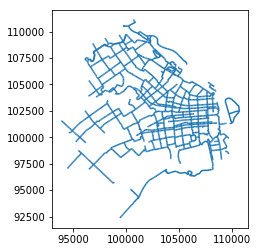

In [134]:
ciclovias_df.plot()

In [135]:
ciclovias_with_buffer = ciclovias_df.copy()
ciclovias_with_buffer['geometry'] = ciclovias_with_buffer.geometry.buffer(30)

In [136]:
ciclovias_with_buffer.head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,...,tooltip_bi,red_jerarq,red_tp,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry
0,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,13,13,13,PALERMO,PALERMO,PALERMO,"POLYGON ((103065.5325559756 108711.9755039961,..."
1,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"POLYGON ((104679.3407381174 107988.8753784508,..."
2,1828,16003,"OBLIGADO RAFAEL, Av.Costanera",3452,4200,3451,4199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"POLYGON ((104816.8656363114 107867.640978357, ..."
3,1997,21059,TRONADOR,0,0,0,0,ESTOMBA Y PLAZA,TRONADOR,CALLE,...,Ciclovía,VÍA LOCAL,None,12,12,12,COGHLAN,COGHLAN,COGHLAN,"POLYGON ((98345.46846434861 107623.9656324848,..."
4,4846,20075,SARMIENTO AV.,2602,3100,2601,3099,None,AV. SARMIENTO,AVENIDA,...,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"POLYGON ((104199.9384944202 105777.4862796715,..."


In [137]:
ciclovias_with_buffer.shape

(2932, 28)

In [138]:
ciclovias_df.head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,...,tooltip_bi,red_jerarq,red_tp,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry
0,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,13,13,13,PALERMO,PALERMO,PALERMO,LINESTRING (103128.1074910719 108699.191765290...
1,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (104784.0365070056 107940.241396083...
2,1828,16003,"OBLIGADO RAFAEL, Av.Costanera",3452,4200,3451,4199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (104911.6935667442 107817.874904555...
3,1997,21059,TRONADOR,0,0,0,0,ESTOMBA Y PLAZA,TRONADOR,CALLE,...,Ciclovía,VÍA LOCAL,None,12,12,12,COGHLAN,COGHLAN,COGHLAN,LINESTRING (98376.11090415106 107631.000347565...
4,4846,20075,SARMIENTO AV.,2602,3100,2601,3099,None,AV. SARMIENTO,AVENIDA,...,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (103918.9643071062 105376.802938277...


In [139]:
ciclovias_with_buffer.to_file("data/ciclovias-with-buffer")

This warning will not be emitted anymore.


In [170]:
sample_tramo = ciclovias_with_buffer.loc[0,'geometry']

In [461]:
intersecting_trees = arbolado_df[arbolado_df['geometry'].within(sample_tramo)]
num_trees = intersecting_trees.shape[0]
sum_heights = intersecting_trees['ALTURA_TOT'].sum()
print(num_trees)
print(sum_heights)

17
162


In [140]:
ciclovias_df['num_trees'] = 0
ciclovias_df['sum_heights'] = 0

for i,tramo in ciclovias_with_buffer.iterrows():
    intersecting_trees = arbolado_df[arbolado_df['geometry'].within(tramo['geometry'])]

    ciclovias_df.loc[ciclovias_df['id']==tramo['id'],'num_trees'] = intersecting_trees.shape[0]
    ciclovias_df.loc[ciclovias_df['id']==tramo['id'],'sum_heights'] = intersecting_trees['ALTURA_TOT'].sum()

In [141]:
ciclovias_df.sort_values(by='num_trees', ascending=False).head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,...,red_tp,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry,num_trees,sum_heights
2689,7030,5017,ELCANO AV.,4402,4600,4401,4599,None,AV. ELCANO,AVENIDA,...,None,15,15,15,CHACARITA,CHACARITA,CHACARITA,LINESTRING (100042.5242003774 104680.243796177...,120,1641.0
2670,3286,12107,DEL LIBERTADOR AV.,3902,4400,3901,4399,"DEL LIBERTADOR GENERAL SAN MARTIN, Av.(parcial...",AV.DEL LIBERTADOR,AVENIDA,...,None,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (103599.1133727918 106483.042592114...,115,1764.0
1183,26627,5067,ESCALADA AV.,0,0,4201,4399,None,AV. ESCALADA,AVENIDA,...,SI,8,8,8,None,VILLA SOLDATI,VILLA LUGANO,LINESTRING (100393.7725185823 95065.2208420920...,91,598.0
2658,2056,21039,"TORNQUIST, ERNESTO AV.",5802,6400,5801,6399,None,AV.ERNESTO TORNQUIST,AVENIDA,...,None,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (102956.1605822595 107555.138661080...,90,371.0
108,2160,1047,"ALSINA, VALENTIN AV.",0,0,0,0,None,AV.VALENTIN ALSINA,AVENIDA,...,None,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (102609.9023445322 107452.193634501...,89,896.0


In [480]:
ciclovias_df.to_file("data/ciclovias-with-trees")

In [142]:
ciclovias_df.crs

{u'ellps': u'intl',
 u'k': 0.999998,
 u'lat_0': -34.6297166,
 u'lon_0': -58.4627,
 u'no_defs': True,
 u'proj': u'tmerc',
 u'units': u'm',
 u'x_0': 100000,
 u'y_0': 100000}

In [143]:
ciclovias_df_wsg84 = ciclovias_df.to_crs({'init':'epsg:4326'})

In [144]:
ciclovias_df_wsg84.crs

{'init': 'epsg:4326'}

In [103]:
# %load shadow.py

import argparse
import math
import struct

zoomLevel = 17

def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = ((lon_deg + 180.0) / 360.0 * n)
    ytile = ((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)


def getShadow(path,lat,lon):

    tile = deg2num(lat,lon,zoomLevel)
    tilePix = (256 * (tile[0] - int(tile[0])), 256 * (tile[1] - int(tile[1])))
    pos = int(tilePix[1] * 256 + tilePix[0])
    
    filePath = '%s/%d/%d/%d.bin'%(path,zoomLevel,tile[0],tile[1])
    f = open(filePath,'rb')
    f.seek(2 * pos)
    value = struct.unpack('h', f.read(2))[0]
    f.close()

    return value

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Get shadow information.')
    parser.add_argument('--lat', action="store", dest="lat", help='Latitude', type=float, required=True)
    parser.add_argument('--lon', action="store", dest="lon", help='Longitude', type=float, required=True)
    parser.add_argument('--path', action="store", dest="path", help='Slippy tiles path', required=True)

    args = parser.parse_args()
    print(getShadow(args.path,args.lat,args.lon))


usage: ipykernel_launcher.py [-h] --lat LAT --lon LON --path PATH
ipykernel_launcher.py: error: argument --lat is required


SystemExit: 2

In [145]:
ciclovias_df_wsg84['seg_shade'] = 0
for index, segment in ciclovias_df_wsg84.iterrows():
    accummulated_segment_shadows = []
    for i in range(1,11):
        interpolated_point_coords = segment['geometry'].interpolate(1/i, normalized=True)
        try:
            point_shadow = getShadow("./data/slippy",interpolated_point_coords.y,interpolated_point_coords.x)
            accummulated_segment_shadows.append(point_shadow)
        except:
            continue
    
    ciclovias_df_wsg84.loc[index,'seg_shade'] = sum(accummulated_segment_shadows) / len(accummulated_segment_shadows)

ciclovias_df_wsg84.head()
    

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,...,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry,num_trees,sum_heights,seg_shade
0,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,13,13,13,PALERMO,PALERMO,PALERMO,LINESTRING (-58.4286201298996 -34.551295251959...,17,162.0,0
1,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (-58.41057497789873 -34.55813028104...,44,468.0,0
2,1828,16003,"OBLIGADO RAFAEL, Av.Costanera",3452,4200,3451,4199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (-58.4091833697879 -34.559232725360...,21,229.0,0
3,1997,21059,TRONADOR,0,0,0,0,ESTOMBA Y PLAZA,TRONADOR,CALLE,...,12,12,12,COGHLAN,COGHLAN,COGHLAN,LINESTRING (-58.48039386423616 -34.56092771298...,17,143.0,306
4,4846,20075,SARMIENTO AV.,2602,3100,2601,3099,None,AV. SARMIENTO,AVENIDA,...,14,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (-58.41998865552824 -34.58124146065...,51,359.0,422


In [148]:
ciclovias_df_wsg84.sort_values(by='seg_shade', ascending=False).head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,...,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry,num_trees,sum_heights,seg_shade
2355,17247,2085,"BLANES, JUAN MANUEL",202,300,201,299,"PLANES, JUAN M. - TUNUYAN",JUAN MANUEL BLANES,CALLE,...,4,4,4,BOCA,BOCA,BOCA,LINESTRING (-58.36005441867166 -34.62972709107...,29,244.0,480
1969,10882,3050,"PERON, JUAN DOMINGO, TTE. GENERAL",1902,2000,1901,1999,CANGALLO,TTE.GENERAL JUAN DOMINGO PERON,CALLE,...,3,3,3,BALVANERA,BALVANERA,BALVANERA,LINESTRING (-58.39297063201344 -34.60736976314...,25,145.0,480
1978,10947,3050,"PERON, JUAN DOMINGO, TTE. GENERAL",2202,2300,2201,2299,CANGALLO,TTE.GENERAL JUAN DOMINGO PERON,CALLE,...,3,3,3,BALVANERA,BALVANERA,BALVANERA,LINESTRING (-58.39725564084233 -34.60768497207...,19,109.0,480
603,11200,17052,"PELLEGRINI, CARLOS",2,100,1,99,ARTES,CARLOS PELLEGRINI,CALLE,...,1,1,1,SAN NICOLAS,SAN NICOLAS,SAN NICOLAS,LINESTRING (-58.38012005259586 -34.60882208836...,6,48.0,480
2178,14016,20089,SENILLOSA,102,200,101,199,CORTINA,SENILLOSA,CALLE,...,6,6,6,CABALLITO,CABALLITO,CABALLITO,LINESTRING (-58.42961135587665 -34.61771739785...,46,372.0,480


In [165]:
noise_df = gpd.read_file("data/mapa_de_ruido_diurno/mapa_de_ruido_diurno.shp")

In [166]:
noise_df.head()

,DB_LO,DB_HI,Comuna,Leyenda,DB_RANGO,COLOR,Periodo,geometry
0,30.0,35.0,1,35 dBA o menos,30-35,169 255 115,Diurno,(POLYGON ((108430.0000315993 105622.5066871973...
1,35.0,40.0,1,35-40 dBA,35-40,76 230 0,Diurno,(POLYGON ((108430.0000315993 105622.5066871973...
2,40.0,45.0,1,40-45 dBA,40-45,38 115 0,Diurno,(POLYGON ((108430.0000315993 105620.9562871973...
3,45.0,50.0,1,45-50 dBA,45-50,255 255 0,Diurno,(POLYGON ((108384.0372315993 105619.9999871973...
4,50.0,55.0,1,50-55 dBA,50-55,254 204 92,Diurno,(POLYGON ((108320.0000315993 105609.9999871973...


In [167]:
noise_df['DB_RANGO'] = noise_df['DB_RANGO'].astype(str)

In [169]:
noise_df['DB_RANGO'].unique()

array(['30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65',
       '65-70', '70-75', '75-80', '80-85', '85-90', '90-95'], dtype=object)

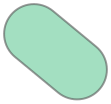

In [171]:
sample_tramo # sample cycle lane segment

In [176]:
intersecting_noise_polys = gpd.overlay(ciclovias_with_buffer.iloc[[0]], noise_df, how="intersection")

In [184]:
average_noise = (intersecting_noise_polys['DB_LO'].mean() + intersecting_noise_polys['DB_HI'].mean()) / 2
average_noise

76.5

In [191]:
ciclovias_df_wsg84['mean_noise'] = 0
for index in range(0, ciclovias_with_buffer.shape[0]):
    intersecting_noise_polys = gpd.overlay(ciclovias_with_buffer.iloc[[index]], noise_df, how="intersection")
    average_noise = (intersecting_noise_polys['DB_LO'].mean() + intersecting_noise_polys['DB_HI'].mean()) / 2
    ciclovias_df_wsg84.loc[ciclovias_df_wsg84['id']==ciclovias_with_buffer.loc[index,'id'],'mean_noise'] = average_noise
    
ciclovias_df_wsg84.head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,...,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry,num_trees,sum_heights,seg_shade,mean_noise
0,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,13,13,PALERMO,PALERMO,PALERMO,LINESTRING (-58.4286201298996 -34.551295251959...,17,162.0,0,76.5
1,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (-58.41057497789873 -34.55813028104...,44,468.0,0,77.5
2,1828,16003,"OBLIGADO RAFAEL, Av.Costanera",3452,4200,3451,4199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (-58.4091833697879 -34.559232725360...,21,229.0,0,75.0
3,1997,21059,TRONADOR,0,0,0,0,ESTOMBA Y PLAZA,TRONADOR,CALLE,...,12,12,COGHLAN,COGHLAN,COGHLAN,LINESTRING (-58.48039386423616 -34.56092771298...,17,143.0,306,57.5
4,4846,20075,SARMIENTO AV.,2602,3100,2601,3099,None,AV. SARMIENTO,AVENIDA,...,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (-58.41998865552824 -34.58124146065...,51,359.0,422,72.5


In [195]:
ciclovias_df_wsg84.sort_values(by='mean_noise', ascending=False).head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,...,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry,num_trees,sum_heights,seg_shade,mean_noise
915,16192,7026,"GARAY, JUAN DE AV.",1032,1100,1031,1099,GARAY - BRASIL,AV. JUAN DE GARAY,AVENIDA,...,1,1,CONSTITUCION,CONSTITUCION,CONSTITUCION,LINESTRING (-58.37841608674137 -34.62652946005...,1,8.0,432,82.5
1313,15169,17028,PASEO COLON AV.,1202,1300,1201,1299,None,AV. PASEO COLON,AVENIDA,...,1,1,SAN TELMO,SAN TELMO,SAN TELMO,LINESTRING (-58.36771902470822 -34.62213258452...,4,32.0,434,82.5
2861,30346,8021,"HORNOS, Gral.",0,0,0,0,None,GRAL. HORNOS,CALLE,...,4,4,BARRACAS,BARRACAS,BARRACAS,LINESTRING (-58.37802822408158 -34.63094364182...,9,60.0,309,81.5
2458,19494,8021,"HORNOS, Gral.",802,1000,801,999,None,GRAL. HORNOS,CALLE,...,4,4,BARRACAS,BARRACAS,BARRACAS,LINESTRING (-58.37618820426158 -34.63667578665...,45,303.0,162,80.0
2832,624,3054,"CANTILO, Int.",0,0,0,0,None,INT. CANTILO,CALLE,...,13,13,BELGRANO,BELGRANO,BELGRANO,LINESTRING (-58.4402472872866 -34.547101207466...,47,223.0,0,80.0


In [196]:
ciclovias_df_trees_shade_noise = ciclovias_df_wsg84.to_crs(ciclovias_df.crs)

In [197]:
ciclovias_df_trees_shade_noise.head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,...,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry,num_trees,sum_heights,seg_shade,mean_noise
0,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,13,13,PALERMO,PALERMO,PALERMO,LINESTRING (103128.1074910719 108699.191765290...,17,162.0,0,76.5
1,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (104784.0365070056 107940.241396083...,44,468.0,0,77.5
2,1828,16003,"OBLIGADO RAFAEL, Av.Costanera",3452,4200,3451,4199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,...,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (104911.6935667442 107817.874904555...,21,229.0,0,75.0
3,1997,21059,TRONADOR,0,0,0,0,ESTOMBA Y PLAZA,TRONADOR,CALLE,...,12,12,COGHLAN,COGHLAN,COGHLAN,LINESTRING (98376.11090415106 107631.000347565...,17,143.0,306,57.5
4,4846,20075,SARMIENTO AV.,2602,3100,2601,3099,None,AV. SARMIENTO,AVENIDA,...,14,14,PALERMO,PALERMO,PALERMO,LINESTRING (103918.9643071062 105376.802938276...,51,359.0,422,72.5


In [198]:
ciclovias_df_trees_shade_noise.to_file("data/ciclovias_df_trees_shade_noise")

This warning will not be emitted anymore.
